<a href="https://colab.research.google.com/github/pratistha9903/python-project/blob/main/Fashion_MNIST_Data_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST Data Classification Project(Final)

> Indented block



STEP 1) Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import keras

Step 2) Load data

In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Print the shape

In [ ]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

There are 60000 images in x train of 28x28 and y train is having 6000 variable .
In testing we have 10000 image of 28x28

Checking the data is in which format

In [ ]:
X_train[0]                                        # it is 2D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt",	"Sneaker","Bag","Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#show image

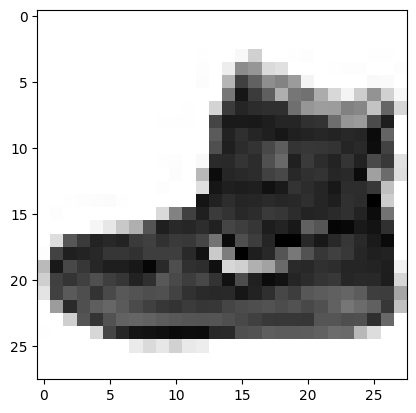

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

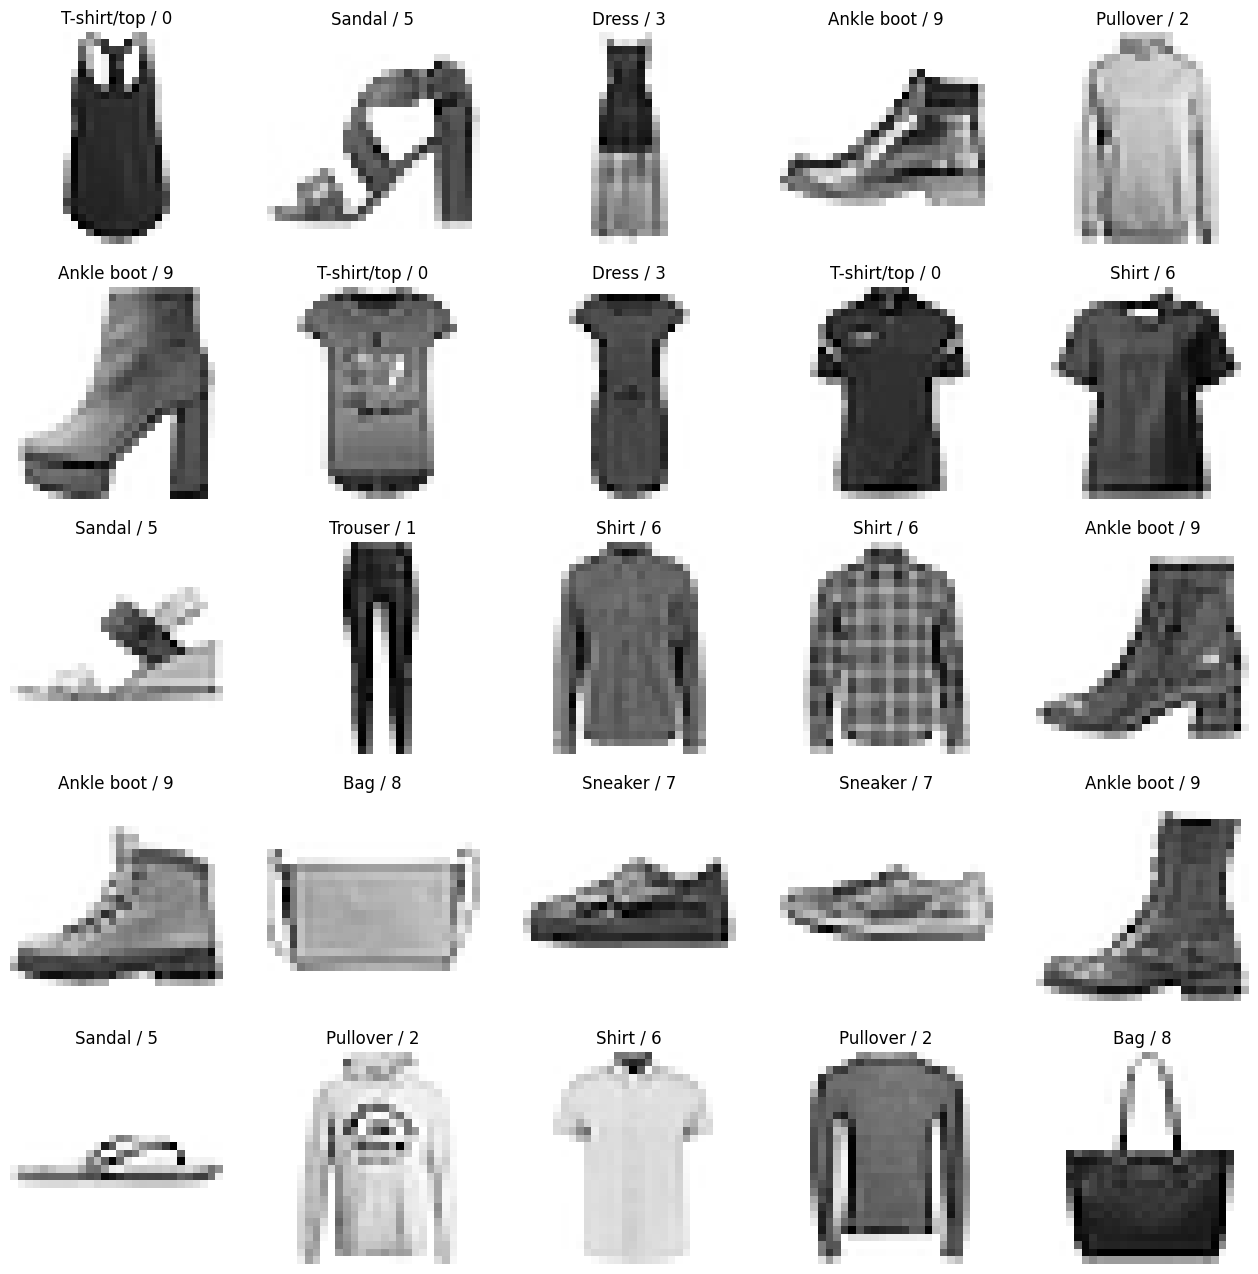

In [ ]:
plt.figure(figsize=(16,16))  # reducing the size of the image from 28*28 to 16*16
j=1
for  i in np.random.randint(0,1000,25):   # randomly selecting
  plt.subplot(5,5,j);j+=1    # 5-row,5-column,j-index and increamenting j by 1
  plt.imshow(X_train[i],cmap='Greys')    # showing the image
  plt.axis('off')                    # remove axis
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))  # for title

In [ ]:
X_train.ndim            # current dimension of the image


3

In [ ]:
X_train = np.expand_dims(X_train,-1)            # expanding the dimension by 1 because in CNN we are required 4D image


In [ ]:
X_train.ndim            # updated dimension of the image


4

In [ ]:
X_test=np.expand_dims(X_test,-1)     # similarly we are expanding the dimnesion of X_test


In [ ]:
#feature scaling


In [ ]:
X_train = X_train/255          # scaling will lie between 0 to 255
X_test= X_test/255


In [ ]:
#split the data for training and testing

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)
 # test size for testing is 0.2 means that 20 % data to be used for testing

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape # for checking the shape and its 4D


((38400, 28, 28, 1), (9600, 28, 28, 1), (38400,), (9600,))

In [ ]:
# 38400 for training and 9600 for testing purpose

In [ ]:
# ALL PART OF PRE DATA PROCESSING ARE DONE

Step 3) Buiding the CNN model

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),        # no of neuron =128
                         keras.layers.Dense(units=10,activation='softmax')       # for output layer
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])    # for compiling the data

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))    #training the model


Epoch 1/10
75/75 [==============================] - 15s 11ms/step - loss: 0.6820 - accuracy: 0.7746 - val_loss: 0.4343 - val_accuracy: 0.8439
Epoch 2/10
75/75 [==============================] - 1s 8ms/step - loss: 0.3904 - accuracy: 0.8637 - val_loss: 0.3829 - val_accuracy: 0.8654
Epoch 3/10
75/75 [==============================] - 0s 7ms/step - loss: 0.3401 - accuracy: 0.8828 - val_loss: 0.3457 - val_accuracy: 0.8766
Epoch 4/10
75/75 [==============================] - 0s 6ms/step - loss: 0.3105 - accuracy: 0.8913 - val_loss: 0.3345 - val_accuracy: 0.8810
Epoch 5/10
75/75 [==============================] - 0s 6ms/step - loss: 0.2918 - accuracy: 0.8971 - val_loss: 0.3144 - val_accuracy: 0.8882
Epoch 6/10
75/75 [==============================] - 1s 8ms/step - loss: 0.2747 - accuracy: 0.9033 - val_loss: 0.3134 - val_accuracy: 0.8882
Epoch 7/10
75/75 [==============================] - 0s 6ms/step - loss: 0.2582 - accuracy: 0.9079 - val_loss: 0.3010 - val_accuracy: 0.8929
Epoch 8/10
75/75 [

In [ ]:
y_pred = model.predict(X_test)    # testing the model X_test
y_pred.round(2)    # rounding off the num till 2 decimal point

313/313 [==============================] - 1s 3ms/step


array([[0.  , 0.  , 0.  , ..., 0.05, 0.  , 0.93],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.08, 0.04, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)   # evaluating the model  and getting the accurracy

313/313 [==============================] - 1s 2ms/step - loss: 0.2995 - accuracy: 0.8930


[0.2995098829269409, 0.8930000066757202]

In [ ]:
# accuracy is good 0.89 that means 89% accurate

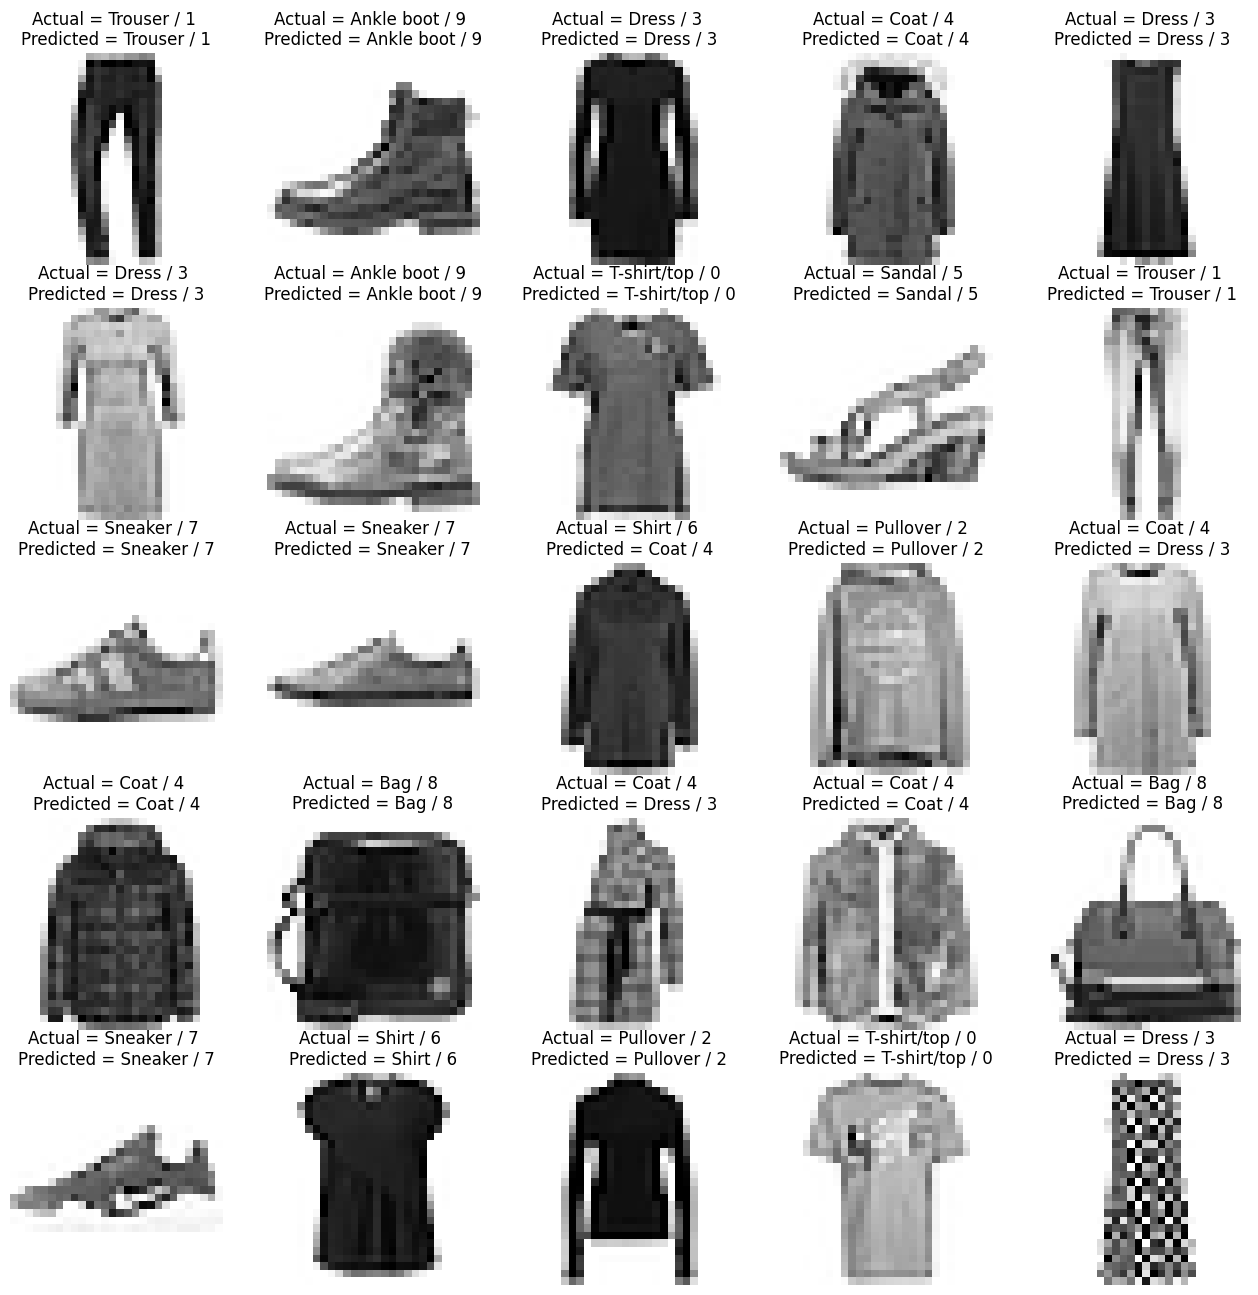

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')



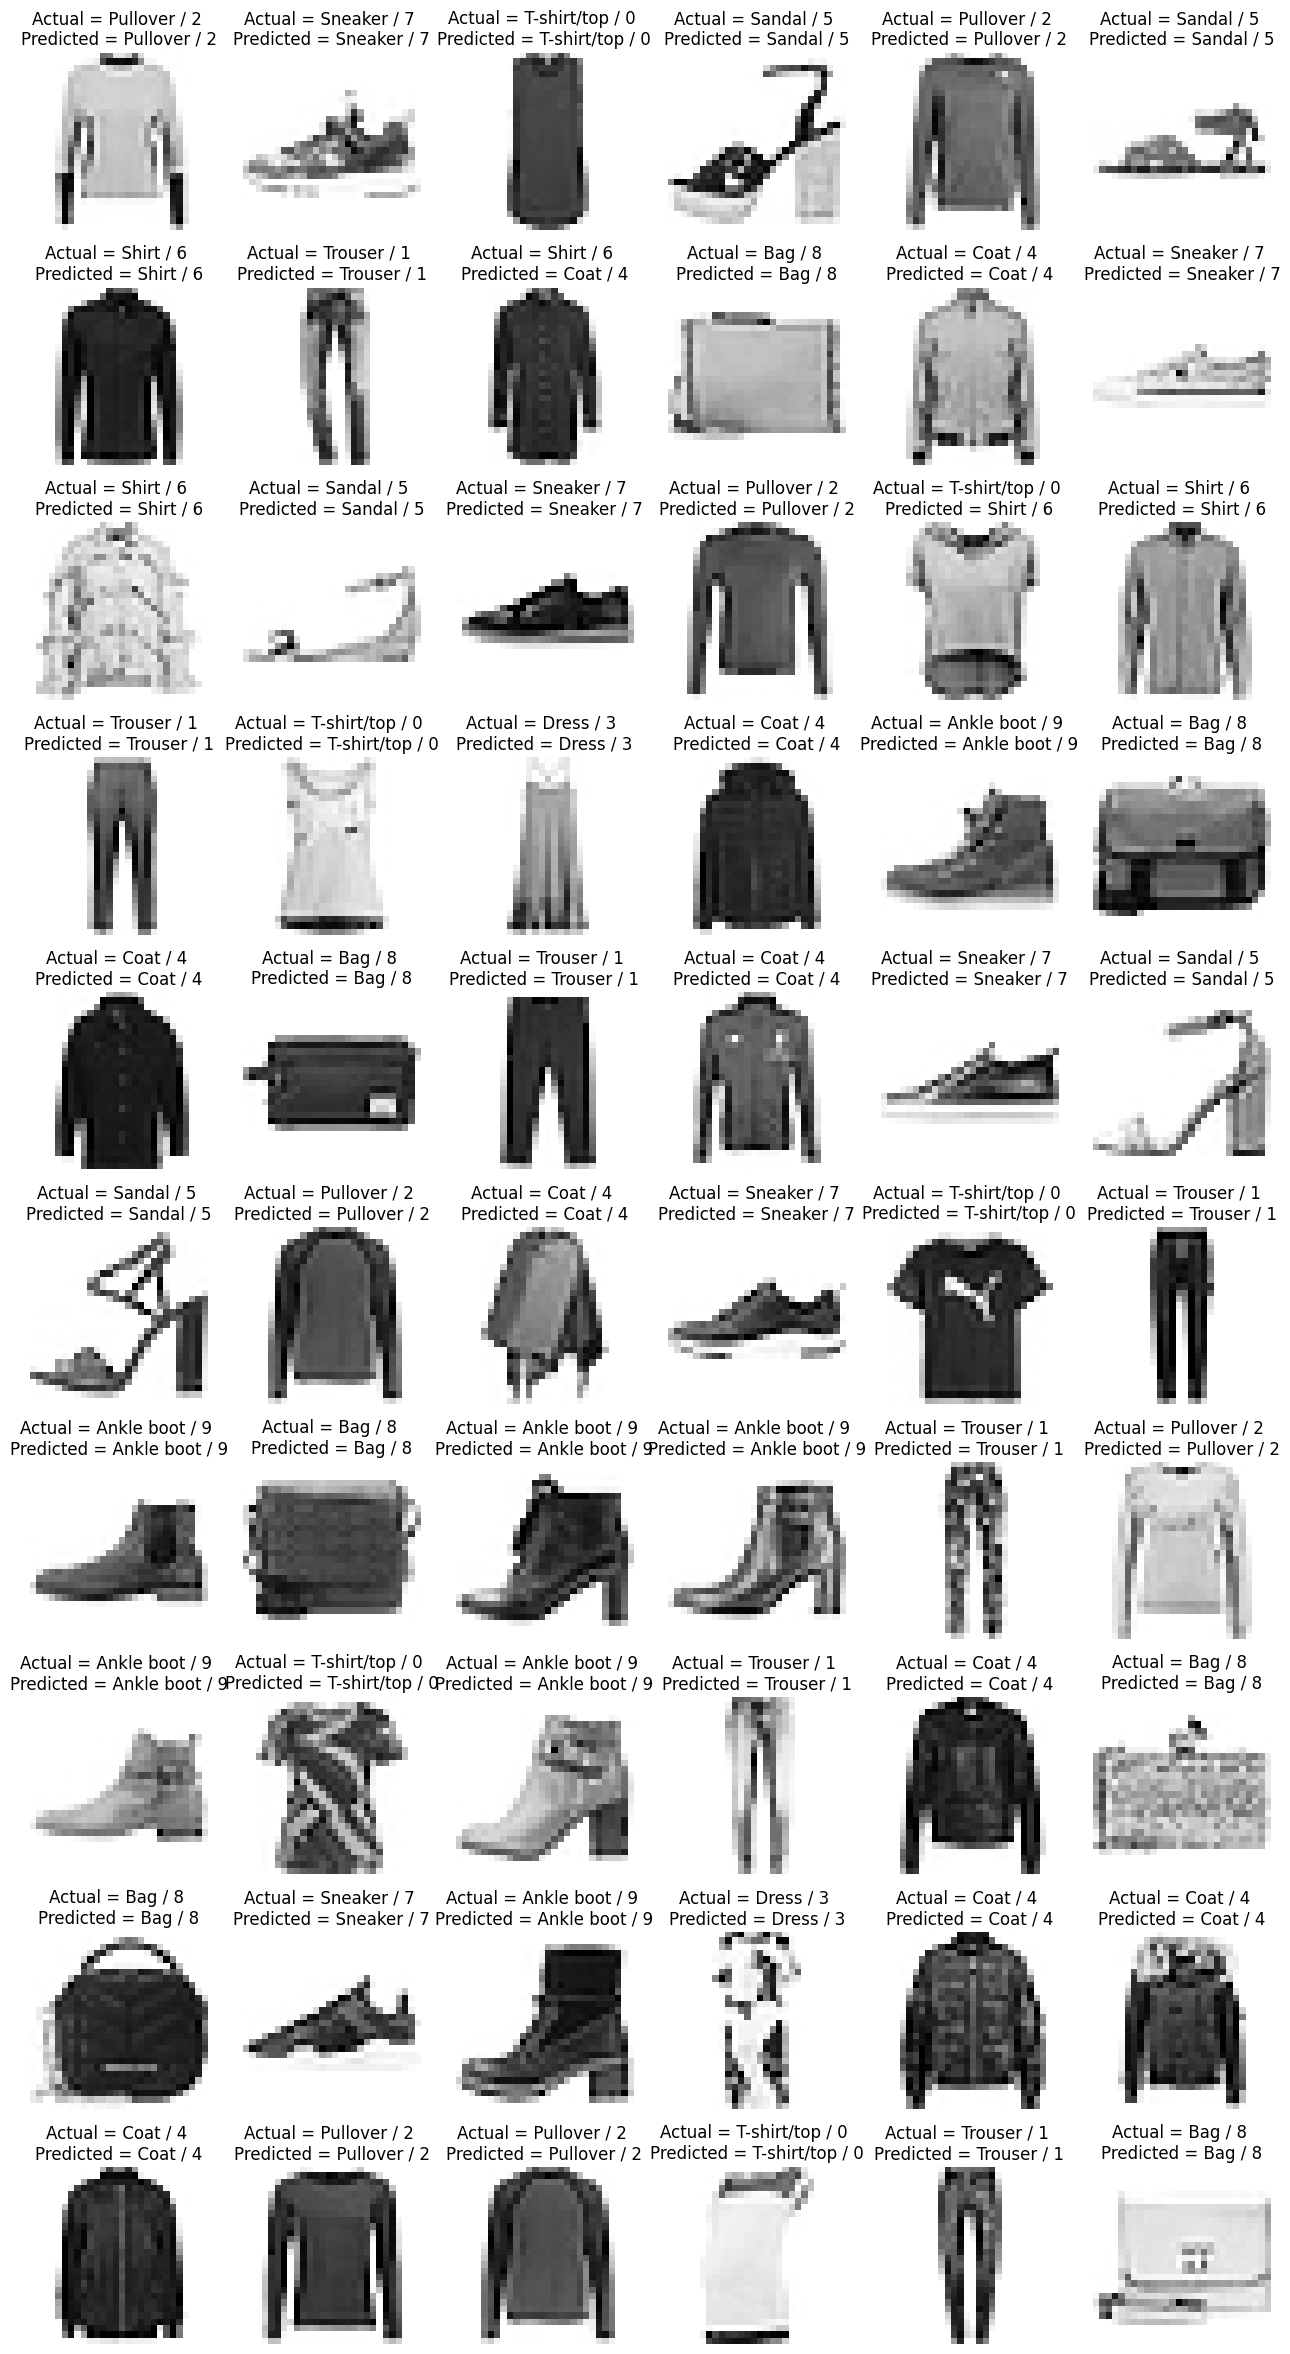

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):     # here we want 60 images
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
#Confusion Matrix


In [ ]:

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)


<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.89      0.76      0.82      1000
       Dress       0.86      0.92      0.89      1000
        Coat       0.76      0.90      0.83      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.73      0.68      0.71      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



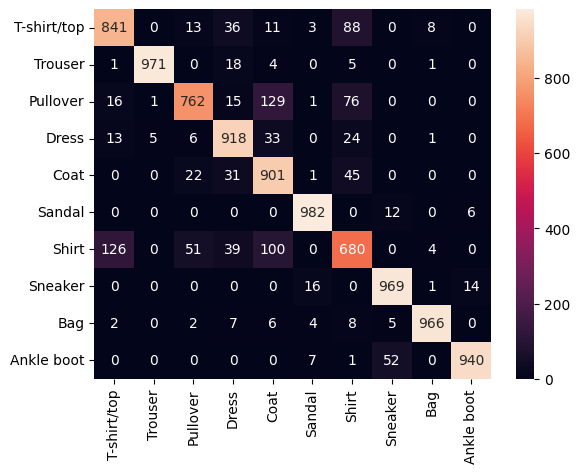

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)


In [ ]:
# save model

In [ ]:

model.save('fashion_mnist_cnn_model.h5')


# Build 2 Complex CNN (Considering The Hidden Layer)

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model2.save('fashion_mnist_cnn_model2.h5')

"""######## very complex model"""

#BUILDING  CNN MODEL
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),                                      #AVOIDS OVER FITTING
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# COMPILE THE MODEL
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#TRAIN the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model3.save('fashion_mnist_cnn_model3.h5')

cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
75/75 [==============================] - 10s 12ms/step - loss: 1.1120 - accuracy: 0.5849 - val_loss: 0.6500 - val_accuracy: 0.7392
Epoch 2/20
75/75 [==============================] - 1s 8ms/step - loss: 0.6110 - accuracy: 0.7668 - val_loss: 0.5293 - val_accuracy: 0.8024
Epoch 3/20
75/75 [==============================] - 1s 8ms/step - loss: 0.5190 - accuracy: 0.8068 - val_loss: 0.4634 - val_accuracy: 0.8331
Epoch 4/20
75/75 [==============================] - 1s 8ms/step - loss: 0.4663 - accuracy: 0.8289 - val_loss: 0.4187 - val_accuracy: 0.8444
Epoch 5/20
75/75 [==============================] - 1s 9ms/step - loss: 0.4203 - accuracy: 0.8453 - val_loss: 0.3861 - val_accuracy: 0.8604
Epoch 6/20
75/75 [==============================] - 1s 9ms/step - loss: 0.3896 - accuracy: 0.8580 - val_loss: 0.3775 - val_accuracy: 0.8652
Epoch 7/20
75/75 [==============================] - 1s 8ms/step - loss: 0.3693 - accuracy: 0.8670 - val_loss: 0.3552 - val_accuracy: 0.8705
Epoch 8/20
75/75 [

[0.48252972960472107, 0.8998000025749207]